<a href="https://colab.research.google.com/github/rboghe/cened/blob/master/cened.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:

try:
  shutil.rmtree('/tmp')
except:
  pass

path_cened_ext = 'https://github.com/rboghe/cened/blob/master/cened_joined.csv?raw=true'

cened = pd.read_csv(path_cened_ext)

In [6]:
for col in cened.columns:
  print(col)

Unnamed: 0
COD_APE
DATA_INS
RESIDENZIALE
NON_RESIDENZIALE
COMUNE_CATASTALE
SEZIONE_x
FOGLIO
PARTICELLA
SUBALTERNO
PROPRIETA_PUBBLICA
USO_PUBBLICO
CLASSIFICAZIONE_DPR
INTERO_EDIFICIO
UNITA_IMMOBILIARE
GRUPPO_UNITA_IMMOBILIARI
NUMERO_UNITA_IMMOBILIARI
NUOVA_COSTRUZIONE
PASSAGGIO_PROPRIETA
LOCAZIONE
RISTRUTTURAZIONE_IMPORTANTE
RIQUALIFICAZIONE_ENERGETICA
OGGETTO_ALTRO
OGGETTO_ALTRO_TXT
REGIONE
COMUNE_x
INDIRIZZO_x
PIANO
INTERNO
WGS84_X
WGS84_Y
location
ZONA_CLIMATICA
ANNO_COSTRUZIONE_x
SUPERF_UTILE_RISCALDATA
SUPERF_UTILE_RAFFRESCATA
VOLUME_LORDO_RISCALDATO
VOLUME_LORDO_RAFFRESCATO
CLIMATIZZAZIONE_INVERNALE
CLIMATIZZAZIONE_ESTIVA
VENTILAZIONE_MECCANICA
PROD_ACQUA_CALDA_SANITARIA
ILLUMINAZIONE
TRASPORTO_PERSONE_COSE
PI
PE
EDIFICIO_ENERGIA_QUASI_ZERO
CLASSE_ENERGETICA_x
EP_GL_NREN
Y
Z
EP_GL_REN
EMISSIONI_CO2
CONSUMI_ENERGIA_ELETTRICA
CONSUMI_GAS_NATURALE
CONSUMI_GPL
CONSUMI_CARBONE
CONSUMI_GASOLIO
CONSUMI_BIOMASSE_SOLIDE
CONSUMI_BIOMASSE_LIQUIDE
CONSUMI_BIOMASSE_GASSOSE
CONSUMI_SOLARE_FOTOV

First of all, let's see what kind of buildings we have:

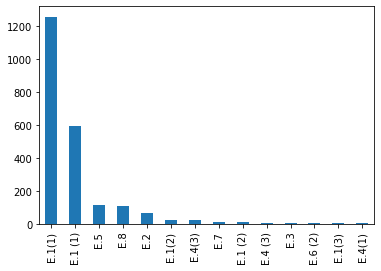

In [14]:
cened.CLASSIFICAZIONE_DPR.value_counts().plot(kind='bar')

The plot shows the number of buildings for each category of the DPR 412/93. The vast majority are residential buildings (E1), followed by commercial activities (E5) and industries (E8). We can also see that the first two categories are actually the same one. We can fix it with:

In [0]:
cened.CLASSIFICAZIONE_DPR.replace('E.1 (1)', 'E.1(1)', inplace=True)

The plot therefore becomes:

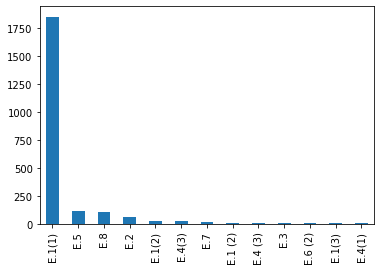

In [18]:
cened.CLASSIFICAZIONE_DPR.value_counts().plot(kind='bar')

Now let's see how the classes are distributed according to cened 2.0:

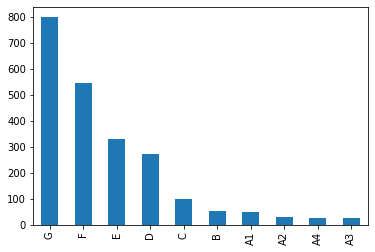

In [10]:
cened.CLASSE_ENERGETICA_x.value_counts().plot(kind='bar')

And according to the older cened 1.2:

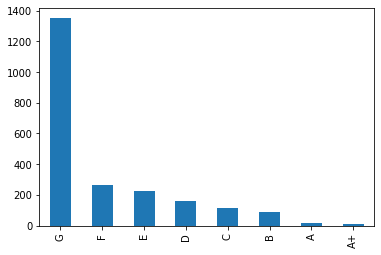

In [11]:
cened.CLASSE_ENERGETICA_y.value_counts().plot(kind='bar')

How many buildings mantained the same class with the new norm?

In [0]:
cened['same'] = cened['CLASSE_ENERGETICA_x'] == cened['CLASSE_ENERGETICA_y']

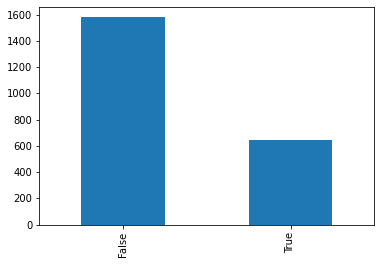

In [13]:
cened.same.value_counts().plot(kind='bar')

--------------------------------------------------------------------------------

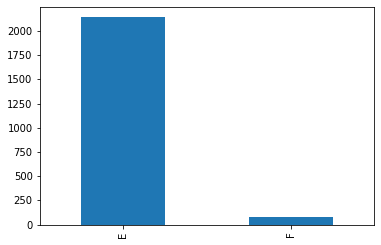

In [7]:
cened.ZONA_CLIMATICA.value_counts().plot(kind='bar')